            trip_distance  fare_amount  tip_amount  total_amount
2019-01-01     352.422312  1317.140946  138.164262   1579.918426
2019-01-02     195.717343   754.801744  125.971982    978.760574
2019-01-03     181.816196   629.109586  166.406141    844.940444
2019-01-04      25.738538   -74.232558   21.462740    -48.792981
2019-01-05    -167.319466  -608.300230 -140.703946   -808.054854
2019-01-06    -417.273266 -1462.745893 -311.247557  -1930.437120
2019-01-07    -210.934635  -720.034367 -135.542415   -929.006755


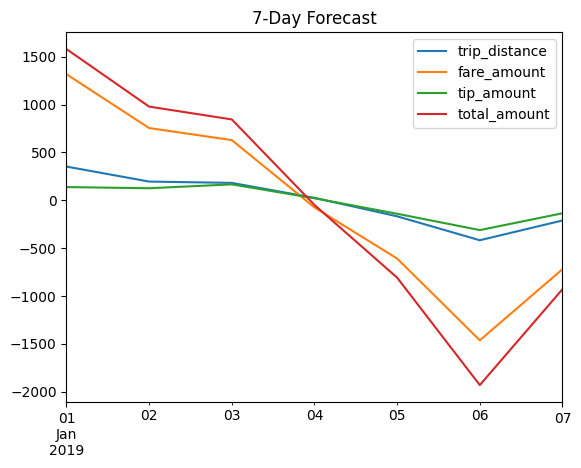

In [6]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/Lenovo/Downloads/taxi dataset.csv")

# Create datetime index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour_of_day']].apply(
    lambda row: f"{row['year']}-{row['month']}-{row['day']} {row['hour_of_day']}:00:00", axis=1))
df.set_index('datetime', inplace=True)

# Resample data to daily level and aggregate
daily_data = df.resample('D').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tip_amount': 'sum',
    'total_amount': 'sum'
})

# Drop missing values (if any)
daily_data.dropna(inplace=True)

# Check for stationarity and difference if needed
data_diff = daily_data.diff().dropna()

# Fit VAR model
model = VAR(data_diff)
results = model.fit(maxlags=15, ic='aic')

# Forecast next 7 days
forecast = results.forecast(data_diff.values[-results.k_ar:], steps=7)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=daily_data.index[-1] + pd.Timedelta(days=1), periods=7),
                           columns=daily_data.columns)

print(forecast_df)
forecast_df.plot(title='7-Day Forecast')
plt.show()


In [4]:
pip install pandas statsmodels matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------  102.4/104.6 kB ? eta -:--:--
     -------------------------------------- 104.6/104.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------ --------------------------- 3.1/9.8 MB 66.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 63.9 MB/s eta 0:00:01
   ---------------------------------- ----- 8.5/9.8 MB 59.9 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 62.9 MB/s eta 0:00:01
   ---------------------------------------  9.8/9.8 MB 62.9 MB/s eta 0:00:01
   ------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
